<h1><center>CSE391  Data Science</center></h1>

<h1><center>Lecture 12</center></h1>
<h1><center>Oct ,2018 </center></h1>




# Evaluation of a classifer performance
 ## We usually consider the the following criteria:
- **Predictive performance **: this refers to the ability of the model to correctly predict the class label of new or previously unseen data
 
- **Speed**: this refers to the computation costs involved in generating and using the model
 
- **Robustness**: this is the ability of the model to make correct predictions given noisy data or data with missing values
- **Scalability**: this refers to the ability to construct the model efficiently given large amount of data
- **Interpretability**: this refers to the level of understanding and insight that is provided by the model
- **Simplicity**:

[SRC](http://www.cs.put.poznan.pl/jstefanowski/sed/DM-4-evaluatingclassifiersnew.pdf)


# The confusion Matrix:
 The most prevalent method to demonstrate the predictive power of a classifier.
 Here we explore:
1. What the confusion matrix is and why you need to use it.
2. How to calculate a confusion matrix for a 2-class classification problem from scratch.
3. How to create a confusion matrix in Python


## Reporting the performance of a classifier in terms of accuracy may yield misleading results. We need more metrics to make sure that classifier performance is satisfactory
 
 
 
 ## Example: A two class study
 You design a classifier that predicts whether an animal is a cat or not based on the animal image . After designing your classifier,  you are given 165 animal images whose labels are already known. You present these images to your classifier and the results are summerized in the below table. This table is called ** confusion matrix**  and valuable information can be extracted therein. In the two class case, we usually call one of the classes as positive and the other as negative class.

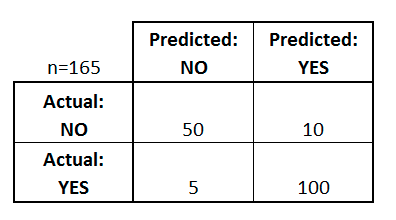

# We can make a summary from this table and define some terms that show the perdictive power of the classifier


- **True positives (TP)**: These are cases in which we predicted positive; the images are in fact cat images and we predicted to be cat using our classifier
- **True negatives (TN)**: We predicted negative , and the images are in fact non cat images
- **False positives (FP)**: We predicted positive ( cat), but they are not images of cat. (Also known as a "Type I error.")
- **False negatives (FN)**: We predicted negative, but they actually are cat images. (Also known as a "Type II error.")

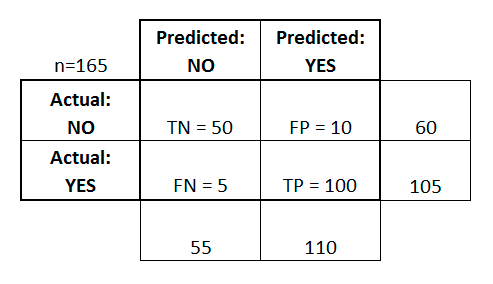

#  Other important metrics that help  evaluate the performance of a classifier extracted from the confusion matrix


- **Accuracy**: Overall, how often is the classifier correct?
    - (TP+TN)/total = (100+50)/165 = 0.91
- **Misclassification Rate** : Overall, how often is it wrong?
    - (FP+FN)/total = (10+5)/165 = 0.09
equivalent to 1 minus Accuracy
also known as "Error Rate"
- **<font color = red> Sensitivity</font>" or "<font color = red>Recall</font>**: When it's actually positive, how often does it predict positive?
    - TP/actual positive = 100/105 = 0.95
    - also known as True Positive Rate"."
- **False Positive Rate**: When it's actually negative, how often does it predict negative?
    - FP/actual no = 10/60 = 0.17
- ** <font color = red> Specificity</font>**: When it's actually no, how often does it predict no?
    - TN/actual negative = 50/60 = 0.83
    - equivalent to 1 minus False Positive Rate
- **Precision**: When it predicts positive, how often is it correct?
    - TP/predicted positive = 100/110 = 0.91
- **Prevalence**: How often does the positive condition actually occur in our sample?
    - actual positve/total = 105/165 = 0.64
    
    [SRC](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# A more complete confusion matrix with all possible terms
## always have this table as a cheatsheet with you when working with classifiers [SRC](https://en.wikipedia.org/wiki/Confusion_matrix)
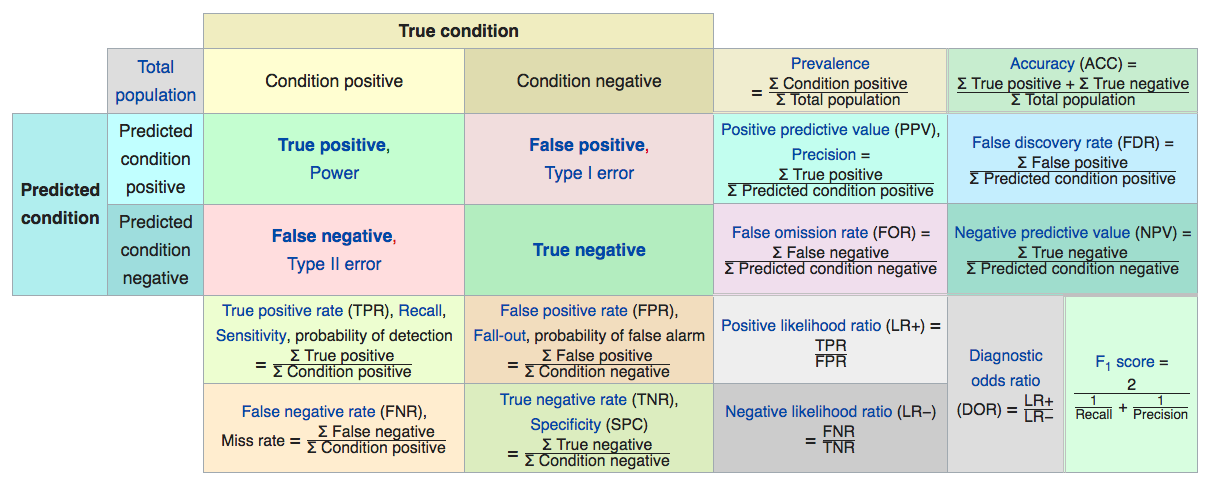

# How to compute the confusion matrix parameters in Python for a classifier
Let's take a look at [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)


Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


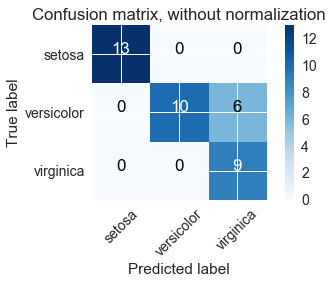

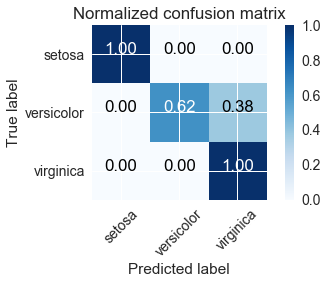

In [33]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Converting the confusion matrix into a dataframe and using heatmap to visualize it

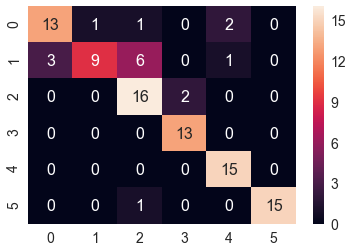

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

array = [[13,1,1,0,2,0],
     [3,9,6,0,1,0],
     [0,0,16,2,0,0],
     [0,0,0,13,0,0],
     [0,0,0,0,15,0],
     [0,0,1,0,0,15]]        
df_cm = pd.DataFrame(array, range(6),
                  range(6))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

# Using Pandas_ml package
## please first pip and instal the package
$ pip install pandas_ml
[SRC](https://pypi.python.org/pypi/pandas_ml)

In [2]:

from pandas_ml import ConfusionMatrix

In [4]:
y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]
cm = ConfusionMatrix(y_actu, y_pred)
cm.print_stats()

C:\Users\nafi\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


Confusion Matrix:

Predicted  0  1  2  __all__
Actual                     
0          3  0  0        3
1          0  1  2        3
2          2  1  3        6
__all__    5  2  5       12


Overall Statistics:

Accuracy: 0.583333333333
95% CI: (0.27666968568210581, 0.84834777019156982)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.189264302376
Kappa: 0.354838709677
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1         2
Population                                   12        12        12
P: Condition positive                         3         3         6
N: Condition negative                         9         9         6
Test outcome positive                         5         2         5
Test outcome negative                         7        10         7
TP: True Positive                             3         1         3
TN: True Negative                             7         8         4
FP: False Positive                  

# F1 Score:  defined as the harmonic mean of precision and recall:


is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score
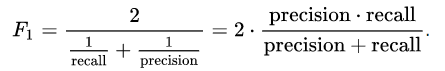

# What is false discovery rate and why we need to consider it?
## Medical testing example

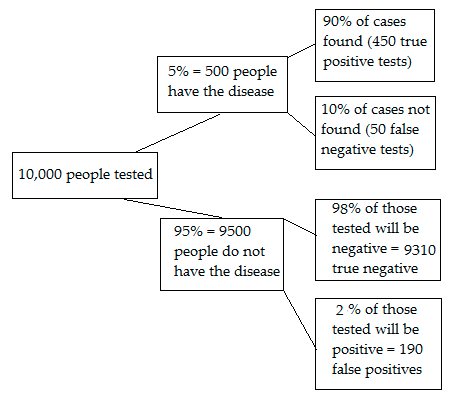

# Show the results given in the above chart in form of a confusion matrix 

Actual labels | Predicted positive | Predicted negative
--- | --- | ---
500 | 450 | here
9500 | 190 | here

# We get back to FDR when we talk about p-values

$\huge \text{FDR} =\frac{\text{number of false positive}}{\text{number of false positive+\text{number of true positive}}}$ 

# Receiver operating characteristic
## ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

- ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

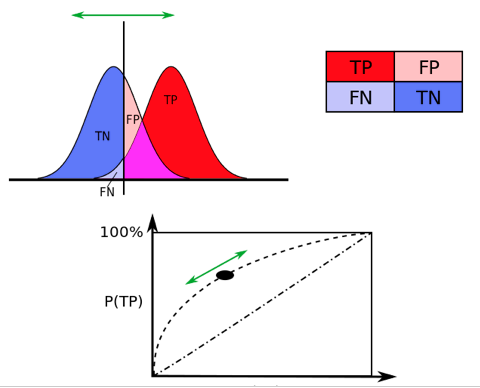

# An interactive [example](http://arogozhnikov.github.io/2015/10/05/roc-curve.html) to understand ROC

# ROC in Python
## example:

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Confusion matrix, without normalization
[[73  0]
 [ 6  0]]


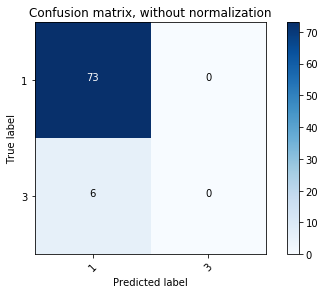

Accuracy: 0.93 ( 0.02)


In [2]:
# quiz
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

Churn = pd.read_csv('/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/data/SampleData_IMC.csv')
Churn.fillna(Churn.mean(), inplace=True)

X = Churn.iloc[:,3:]
y = Churn.iloc[:,2]



class_names = ['1','3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)



classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


#cm = ConfusionMatrix(y_test, y_pred)
#cm.print_stats()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')



plt.show()

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)  
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
                                             
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))




